In [1]:
!pip install dill

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 1.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
import dill
url = 'https://raw.githubusercontent.com/divyansha1115/Graduate-Admission-Prediction/refs/heads/master/Admission_Predict_Ver1.1.csv'
data = pd.read_csv(url)
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None


In [4]:
print(data.isnull().any())

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool


<Axes: >

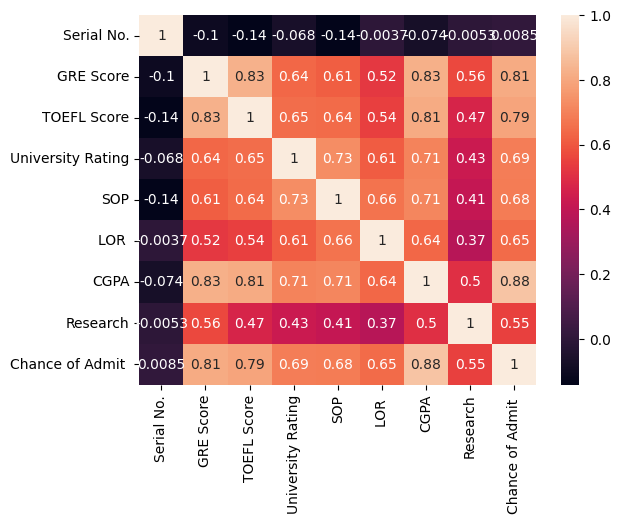

In [5]:
sns.heatmap(data.corr(), annot = True)

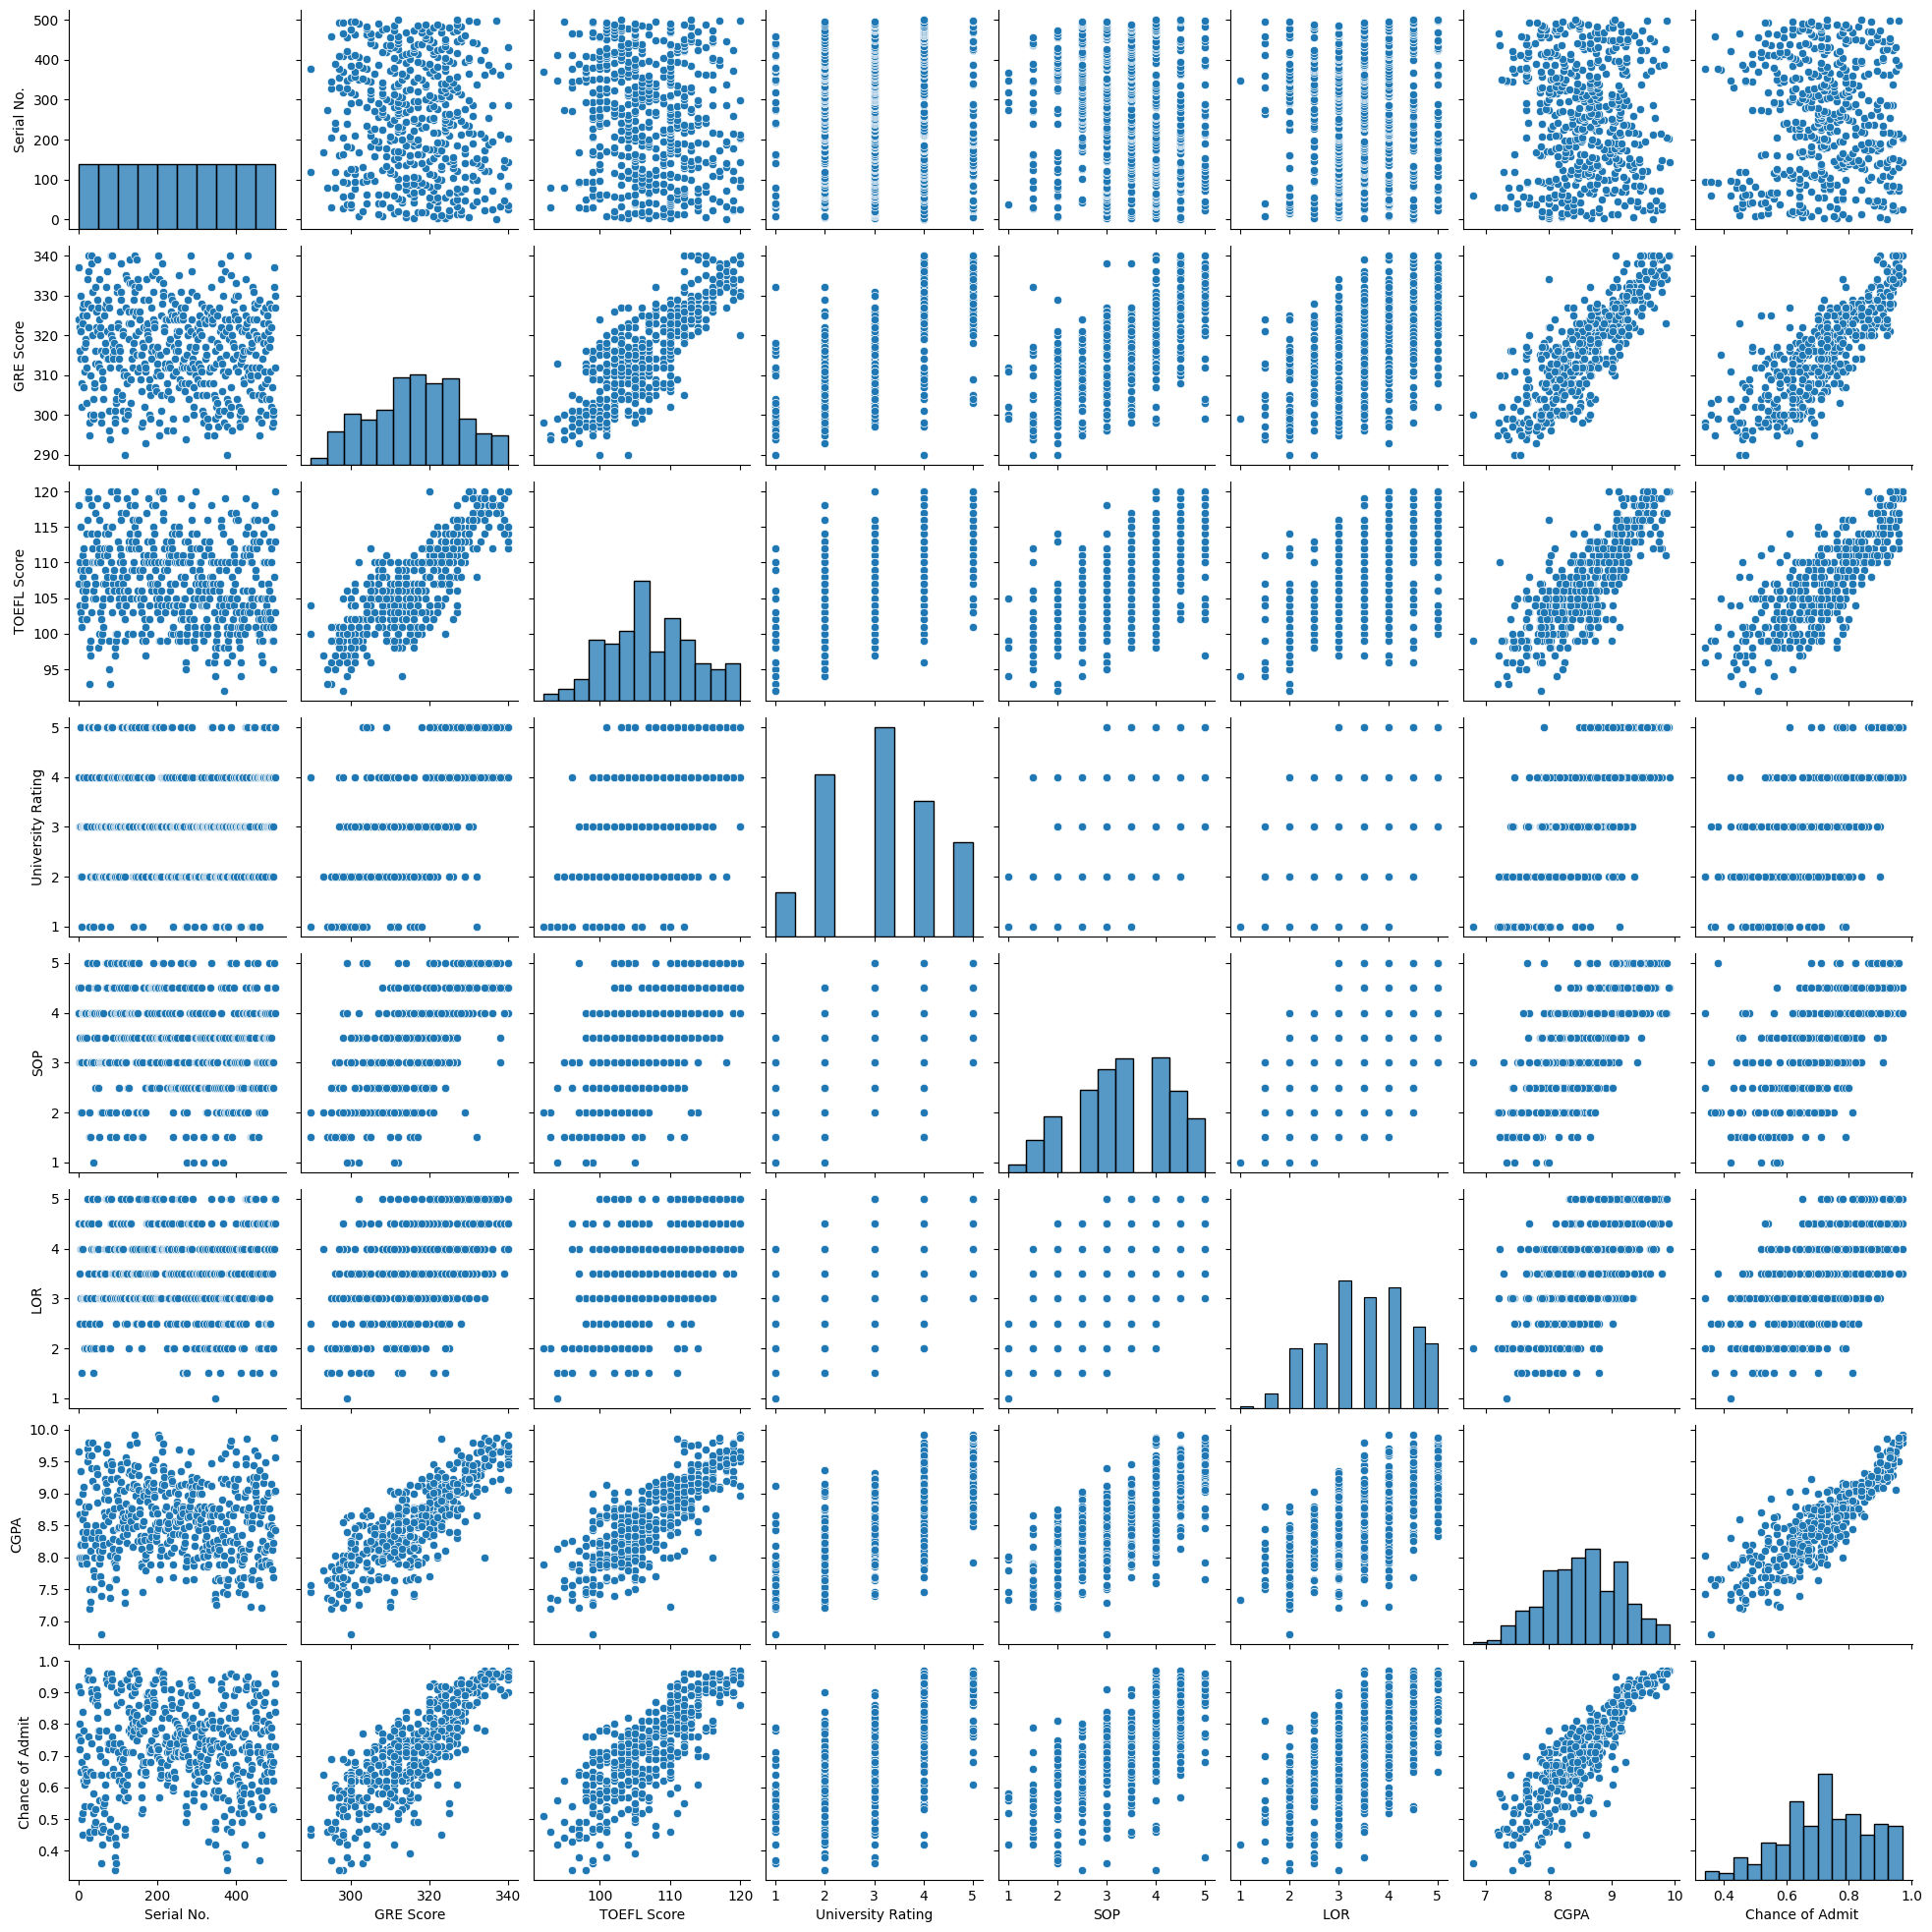

In [ ]:
sns.pairplot(data.drop(columns = 'Research'))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns ='Chance of Admit '), data['Chance of Admit '], test_size =0.2)
x_train.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,252.275000,316.340000,107.12000,3.137500,3.347500,3.460000,8.584825,0.567500
std,142.161155,11.381927,6.09331,1.140986,0.982551,0.922919,0.589237,0.496043
min,1.000000,290.000000,92.00000,1.000000,1.000000,1.000000,7.200000,0.000000
25%,133.750000,308.000000,102.75000,2.000000,2.500000,3.000000,8.130000,0.000000
50%,251.500000,317.000000,107.00000,3.000000,3.500000,3.500000,8.620000,1.000000
75%,371.250000,325.000000,112.00000,4.000000,4.000000,4.000000,9.042500,1.000000
max,499.000000,340.000000,120.00000,5.000000,5.000000,5.000000,9.920000,1.000000


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train = pd.DataFrame(x_train, columns = data.drop(columns = 'Chance of Admit ').columns)
x_test = pd.DataFrame(x_test, columns = data.drop(columns = 'Chance of Admit ').columns)
x_train.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.082580,0.673840,0.637561,-0.120661,-0.863631,-2.126356,0.348641,0.872992
1,0.096666,-0.293815,-0.841318,-0.120661,-0.863631,-1.041481,0.161725,-1.145486
2,-1.283777,1.025714,1.294841,0.756872,1.174436,0.585833,0.977357,0.872992
3,-1.713405,-1.261470,-0.841318,-1.875726,-1.373147,-2.126356,-0.993755,-1.145486
4,0.223442,0.409934,0.637561,-0.120661,-0.863631,-0.499043,0.535556,0.872992


In [ ]:
gridsearch = GridSearchCV(estimator = RandomForestRegressor(),
  param_grid = {
    'n_estimators': [50, 250, 300],
    'max_depth': [200, 100, 200, 300]
  },
cv = 4,return_train_score =True,scoring = 'r2')
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [200, 100, 200, 300],
                         'n_estimators': [50, 250, 300]},
             return_train_score=True, scoring='r2')

In [ ]:
pd.DataFrame(gridsearch.cv_results_).set_index('rank_test_score').sort_index()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
rank_test_score,,,,,,,,,,,,,,,,,,,
1,0.728160,0.156325,0.024134,0.004721,200,300,"{'max_depth': 200, 'n_estimators': 300}",0.866101,0.757331,0.767571,0.809125,0.800032,0.042793,0.970515,0.973796,0.975266,0.975821,0.973849,0.002062
2,0.630996,0.010211,0.018760,0.001154,300,300,"{'max_depth': 300, 'n_estimators': 300}",0.866858,0.756771,0.767849,0.805605,0.799271,0.043016,0.970805,0.973571,0.974954,0.976046,0.973844,0.001961
3,0.528307,0.003351,0.015992,0.000512,200,250,"{'max_depth': 200, 'n_estimators': 250}",0.859964,0.761596,0.766206,0.806955,0.798680,0.039541,0.971177,0.974006,0.975077,0.976629,0.974222,0.001990
4,0.639364,0.005285,0.022925,0.003297,100,300,"{'max_depth': 100, 'n_estimators': 300}",0.859020,0.759220,0.765376,0.809539,0.798289,0.040076,0.970573,0.974999,0.975744,0.975895,0.974303,0.002180
5,0.531210,0.004075,0.018671,0.003850,200,250,"{'max_depth': 200, 'n_estimators': 250}",0.857222,0.761702,0.767719,0.805263,0.797976,0.038061,0.970610,0.974252,0.975438,0.975849,0.974037,0.002064
6,0.529861,0.007272,0.015549,0.000076,100,250,"{'max_depth': 100, 'n_estimators': 250}",0.864697,0.757628,0.763286,0.805620,0.797808,0.042841,0.970397,0.974405,0.974873,0.976211,0.973972,0.002168
7,0.710128,0.184443,0.018711,0.004910,300,250,"{'max_depth': 300, 'n_estimators': 250}",0.861638,0.758041,0.763020,0.806953,0.797413,0.041680,0.969877,0.974108,0.974347,0.976035,0.973592,0.002270
8,0.842044,0.193034,0.025463,0.004386,200,300,"{'max_depth': 200, 'n_estimators': 300}",0.859538,0.756739,0.767092,0.805479,0.797212,0.040306,0.970743,0.975237,0.974820,0.976211,0.974253,0.002088
9,0.132983,0.017105,0.005769,0.000759,200,50,"{'max_depth': 200, 'n_estimators': 50}",0.861240,0.755968,0.765136,0.804244,0.796647,0.041466,0.968498,0.974790,0.973319,0.974242,0.972712,0.002489


In [ ]:
pipe = make_pipeline(scaler, gridsearch)
#export pipeline
with open('rf_r.pkl', 'wb') as f:
  dill.dump(pipe, f)

In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/divyansha1115/Graduate-Admission-Prediction/refs/heads/master/Admission_Predict.csv')
test_x = test.drop(columns = 'Chance of Admit ', axis = 1)

In [ ]:
#import the saved pipe
with open('rf_r.pkl', 'rb') as f:
  model = dill.load(f)
print(model.predict(test_x))

[0.92823333 0.7589     0.62176667 0.744      0.60666667 0.91363333
 0.5976     0.58343333 0.52343333 0.5141     0.55523333 0.79746667
 0.80006667 0.58653333 0.58363333 0.55786667 0.6572     0.63356667
 0.66056667 0.59563333 0.6151     0.6593     0.9164     0.9406
 0.96413333 0.9334     0.72586667 0.44816667 0.45566667 0.52913333
 0.6308     0.6257     0.91093333 0.91253333 0.9459     0.8835
 0.55823333 0.55756667 0.53083333 0.5215     0.5095     0.5271
 0.543      0.84163333 0.9026     0.87466667 0.87923333 0.91413333
 0.72836667 0.73386667 0.68553333 0.5545     0.57143333 0.6511
 0.56883333 0.61353333 0.5828     0.44266667 0.46526667 0.4836
 0.5701     0.5283     0.55486667 0.57003333 0.6808     0.62973333
 0.64783333 0.6142     0.75163333 0.79946667 0.93853333 0.95703333
 0.8999     0.79476667 0.7033     0.72166667 0.74606667 0.61813333
 0.433      0.46003333 0.53563333 0.9277     0.89953333 0.91553333
 0.9295     0.73646667 0.6409     0.63606667 0.63263333 0.73483333
 0.62286667 0.4

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
